# Day 9

In [18]:
def parse_line(line):
    return [int(n) for n in line.strip()]

def get_height(i, j, lines):
    if (i < 0) or (j < 0) or (i >= len(lines)) or (j >= len(lines[i])):
        return 9
    else:
        return lines[i][j]

def check_point(m, n, height, lines):
    points = [get_height(m+i, n, lines) for i in [-1, 1]] + [get_height(m, n+i, lines) for i in [-1, 1]]
    return min(points) > height

def find_low_points(lines):
    for i, line in enumerate(lines):
        for j, height in enumerate(line):
            if check_point(i, j, height, lines):
                yield i, j, height

with open('day9.txt', 'r') as f:
    lines = [parse_line(line) for line in f]
    
low_points = [*find_low_points(lines)]

sum(t[2] + 1 for t in low_points)

468

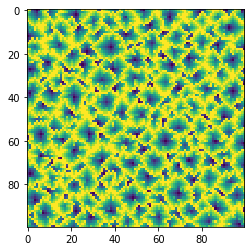

In [19]:
# Unnecessary, but just for displaying the diagram of pools

import matplotlib.pyplot as plt

plt.imshow(lines)
plt.show()

In [20]:
from functools import reduce
from operator import mul
from enum import Enum

class Direction(Enum):
    UP = 1,
    DOWN = 2
    LEFT = 3
    RIGHT = 4
        
    def antidirection(self):
        if self is Direction.UP:
            return Direction.DOWN
        elif self is Direction.DOWN:
            return Direction.UP
        elif self is Direction.LEFT:
            return Direction.RIGHT
        elif self is Direction.RIGHT:
            return Direction.LEFT

class Point:
    def __init__(self, m, n, *, search_direction=None, origin=None):
        self.m, self.n = m, n
        self.neighbours = {}
        if origin:
            self.set_neighbour(origin, search_direction.antidirection())     
            origin.set_neighbour(self, search_direction)
            
    def set_neighbour(self, point, search_direction):
        self.neighbours[search_direction] = point
        
    def is_explored(self, direction):
        return direction in self.neighbours
    
    def is_fully_explored(self):
        return all(
            self.is_explored(direction)
            for direction in Direction.__members__.values()
        )
            
def search(origin, direction, basin):
    if direction is Direction.UP:
        m = origin.m - 1
        n = origin.n
    elif direction is Direction.DOWN:
        m = origin.m + 1
        n = origin.n
    elif direction is Direction.LEFT:
        m = origin.m
        n = origin.n - 1
    else:
        m = origin.m
        n = origin.n + 1
    if (m, n) in basin:
        point = basin[(m, n)]
        origin.set_neighbour(point, direction)
        point.set_neighbour(origin, direction.antidirection())
        return None
    height = get_height(m, n, lines)    
    if height == 9:
        origin.set_neighbour(None, direction)
        return None
    else:
        point = Point(m, n, search_direction=direction, origin=origin)
        basin[(point.m, point.n)] = point
        explored_points.add((point.m, point.n))
        return point
    
def explore(origin, basin):
    for direction in Direction.__members__.values():
        if origin.is_explored(direction):
            continue        
        point = origin
        while point:
            point = search(point, direction, basin)

def explore_basin(m, n):
    origin = Point(m, n)
    basin = {(m,  n): origin}    
    while True:
        unexplored = [point for point in basin.values() if not point.is_fully_explored()]
        if not unexplored:
            break
        for point in unexplored:
            explore(point, basin)
    return basin

explored_points = set()
basin_sizes = sorted(
    (len(explore_basin(m, n)) for m, n, _ in low_points if (m, n) not in explored_points),
    reverse=True
)
reduce(mul, basin_sizes[:3], 1)

1280496